 # <font color = #254117>[EEP 147]: Introduction to Python and Programming</font>

In this notebook, we will go over simple techniques in Python and Matplotlib that you can use to generate graphs that will help you in analyzing the ESG!


First on our agenda is to import **<font color = ##008700>dependencies</font>** -- or packages in Python that add to the basic functions in Python. Kind of like accessorizing! For example, `matplotlib` allows us to generate the graphs we will be using.

The format is as follows: <code><font color = ##008700><b>from</b></font> (package) <font color = ##008700><b>import</b></font> (stuff)</code>, where the "stuff" we're importing can range from a specific function in that package to a whole library of functions, as is the case when we type <code><font color = ##008700><b>import</b></font> (package) <font color = ##008700><b>as</b></font> (name)</code>.

In [1]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

## <font color = #254117>Before we begin...</font>
Please help us better establish the audience that we are reaching by filling out the following form:<br />
*insert link here!*

## <font color = #254117> Section 1: Math in Python </font>

Python is the programming language that we will use in this lab. Although this lab will go over some basics, should you be more interested in learning Python feel free to check out the following resources:

* **[Python Tutorial](https://docs.python.org/3.5/tutorial/)**: Introduction to Python from the creators of Python
* **[Composing Programs](http://composingprograms.com/pages/11-getting-started.html)**: An introduction to programming with Python from CS 61A

**<font color = #254117>Mathematical Expressions</font>**
In Python, we can carry out all the mathematical processes you know and love:

* Add using `+`
* Subtract using `-`
* Multiply using `*`
* Divide using `/`
* Exponentiate using `**`
* Floor divide using `//`
* Take the remainder / modulo using `%`

The most of these you should be familiar with, but let's go over some of the more obscure processes while beginning to implement some python code!

To submit the following cells and run the code, press Shift + Enter/Return!

In [2]:
# So what exactly does floor divide do?
10 // 3

3

In [3]:
# What about modulo?
10 % 3

1

Very cool! Now we'll let you try, and notice that we can use parentheses to organize our order of operations.

**<font color = ##008700>Exercise</font>**: Take the product of *three* and *three to the power of six* and subtract 169.

In [4]:
# Insert your code where the dots are:
...

Awesome job! Feel free to add more cells using the + button in the upper left hand corner of the lab and play around with more mathematical expressions later! In the meantime, let's move on to the next section.

## <font color = #254117>Section 2: Variables</font>

As you might recall, a name that is used to denote a value is called a variable. In python, variables can be declared and values can be assigned. Here are a few examples of variables and their assignment:

In [5]:
x = 2
m = 3
b = 4
y = m*x + b
# Look familiar? Press shift + enter to see the value!
y

10

**<font color = #254117>Output and Printing</font>**

As you might have noticed at the end, there is a difference between returning and printing:

* **Return**: A value that is not necessarily printed, but is stored away inside a computer if we assign or bind it to a name.
* **Printing**: A value that pops up on our screen.
We print using a **print** function and return a value using the **return** function.

**<font color = #254117>Functions?</font>**

You might recall that a function receives input and correspondingly will output something. In Python, we have numerous functions, such as:

* `print`: The command `print('hi')` will print 'hi' out to the screen.
* `sum`: The command `sum(2,3,4)` will sum up the values enclosed in the parentheses and return the value.
* And more!

The best thing about functions is that, in Python, we can make our own functions! We will discuss this more in depth later, but for now just remember that to call a function, we write the name of the function, like `print()` and we place our <font color = ##008700>arguments</font> inside the parentheses. 

Let's try it for ourselves!

**<font color = ##008700>Exercise</font>**: Try printing out the phrase 'Hello World!'

In [6]:
...

Ellipsis

## <font color = #254117>Section 3: Functions and Loops

A function is a block of organized, reusable code that is used to perform a single, related action. Take for example a factorial, denoted `x!`, which takes the initial value `x` and multiplies it by `x-1` and `x-2` and so on and so forth until it gets to 1! Typing this all out would look something like this:

In [7]:
# Let's pick a random value for x:
x = 5
factorial = 5 * 4 * 3 * 2 * 1
factorial

120

This might not seem too troublesome now, but imagine doing this by hand for a larger number like 123! Instead, let's consider writing a function that can take in any value (such as 123) and output the factorial!

**<font color = #254117>Function Structure</font>**

So how can we begin writing a function? Well there is a very simple structure to them:

<code>**<font color = ##008700>def</font>** function_name(arguments):
    [function procedures]
    **<font color = ##008700>return</font>** [output]</code>
    
There are some aspects of a function that are required no matter what kind of function you are writing. You will always begin writing a function by writing **<font color = ##008700>def</font>**, followed by the name of your function. Following the name of your function, you will want to specify your inputs by using parentheses and giving your inputs names. These names can be anything you'd like, but generally you'd like them to be memorable and symbolic of what you're trying to do.

Before typing in your functions procedure in the **<font color = ##008700>body</font>** of your function, you'll want to end the first line with a `:`. Then you're ready to proceed to the body and second line of your function! You will want to indent (press tab or space 4 times) and write what you'd like your function to do.

Lastly, you'll want to end the function by writing what you'd like your function to **<font color = ##008700>return</font>**.

**<font color = ##008700>Example</font>**: Let's look at what a factorial function would look like!

In [8]:
def factorial_func(x):
    product = 1
    while x > 0:
        product = product * x
        x = x - 1
    return product

# Now let's test out our new factorial function!
factorial_func(5)

120

In [9]:
# Try calculating the factorial value for the big number from before:
factorial_func(123)

12146304367025329675766243241881295855454217088483382315328918161829235892362167668831156960612640202170735835221294047782591091570411651472186029519906261646730733907419814952960000000000000000000000000000

Amazing! However, you might have noticed there were some new features used, which brings us to our next small topic.

**<font color = #254117>Loops</font>**

Something that came in handy for this equation was a loop. A loop is a piece of code that repeats a block of code **<font color = ##008700>while</font>** a condition is true or **<font color = ##008700>for</font>** a certain number of times. Like we just not-so-subtly hinted, there are two very important kinds of loops: for loops and while loops. In the case of our function above, the code under the while loop was repeated **while** `x > 0`. On the other hand, a for loop will continue looping **for** a specified number of times.

## <font color = #254117>Section 4: Data Structures</font>

So now that we know how to calculate things and create functions to do so, how can we organize large amounts of information?

The solution to our problem is a data structure! A data structures is simply a means by which to contain and organize our data or information. They include:
* **<font color = ##008700>List</font>**: A list holds an ordered collection of items similar to a grocery list.
* **<font color = ##008700>Dictionary</font>**: Like an addressbook in which keys are associated with values (similar to names and phone numbers in addressbooks).
* **<font color = ##008700>Set</font>**: An unordered collection of items, and they operate similar to how Venn Diagrams do.

Here is how we can use lists:

In [10]:
# Creating a list using brackets and commas in between:
names = ['Helen', 'Nadeem', 'Alma', 'Nika']
names

['Helen', 'Nadeem', 'Alma', 'Nika']

In [11]:
# The first name in our list, located at position 0:
names[0]

'Helen'

In [12]:
# Adding a name, feel free to change the name to yours!
names.append('Sam')
names

['Helen', 'Nadeem', 'Alma', 'Nika', 'Sam']

**<font color = ##008700>Exercise</font>**: Now you try creating a list with the names of some of your friends or pets!

In [13]:
# Create your list below:
...

As opposed to a list (or array), a dictionary contains **<font color = ##008700>keys</font>** and **<font color = ##008700>values</font>** that, when defined, are separated by a colon. Take a look at the example below:

In [54]:
# Creating a dictionary
dictionary = {'Helen': 'Math', 'Nadeem': 'Physics', 'Alma': 'Data Science', 'Nika': 'MCB'}

To call a certain value in a dictionary, we use the corresponding key:

In [55]:
dictionary['Helen']

'Math'

Calling an index won't work here! Feel free to play around with the dictionary or create your own. One thing to note is that in a given dictionary, the keys must be unique, but values do not have to be.

In addition to the data structures listed above, we can also organize our information in a table. Similar to Google Sheets or Microsoft Excel, we will be organzing our data into nice-looking tables.

## <font color = #254117>Section 5: Tables</font>
In this section, we'll cover some basic table functions. In order to begin filtering through information stored in a table, we'll have to "read in" the information. Most of the time, information to be displayed as a table is stored as a `.csv` file which stands for **<font color = ##008700>comma separated values</font>**.

To read in a file, we use the following command:

`Table.read_table('file_name.csv')`

and in order to store it, we'll assign it a name or label. We'll begin by reading in the file that you'll be using for the remainder of the lab:

In [14]:
# Just run this code block!
ESG_table = Table.read_table('ESGPorfolios_forcsv.csv')

In [15]:
ESG_table

Group,Group_num,UNIT NAME,Capacity_MW,Heat_Rate_MMBTUperMWh,Fuel_Price_USDperMMBTU,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay,Unnamed: 11,Unnamed: 12,Unnamed: 13
Big Coal,1,FOUR CORNERS,1900,11.67,3,35,1.5,36.5,1.1,"$8,000",nan,nan,nan
Big Coal,1,ALAMITOS 7,250,16.05,4.5,72.22,1.5,73.72,0.85,$0,nan,nan,nan
Big Coal,1,HUNTINGTON BEACH 1&2,300,8.67,4.5,39,1.5,40.5,0.46,"$2,000",nan,nan,nan
Big Coal,1,HUNTINGTON BEACH 5,150,14.44,4.5,65,1.5,66.5,0.77,"$2,000",nan,nan,nan
Big Coal,1,REDONDO 5&6,350,8.99,4.5,40.44,1.5,41.94,0.48,"$3,000",nan,nan,nan
Big Coal,1,REDONDO 7&8,950,8.99,4.5,40.44,1.5,41.94,0.48,"$5,000",nan,nan,nan
Big Gas,2,EL SEGUNDO 1&2,400,9.63,4.5,43.33,1.5,44.83,0.51,"$1,000",nan,nan,nan
Big Gas,2,EL SEGUNDO 3&4,650,8.83,4.5,39.72,1.5,41.22,0.47,"$1,000",nan,nan,nan
Big Gas,2,LONG BEACH,550,11.56,4.5,52,0.5,52.5,0.61,"$2,000",nan,nan,nan
Big Gas,2,NORTH ISLAND,150,14.44,4.5,65,0.5,65.5,0.77,$0,nan,nan,nan


**<font color = #254117>Table Manipulations</font>**

One of the many manipulations you can make on a table is to sort it by some value. When do you think this might be helpful?

In order to sort, we will use the following table method:

`table.sort("column_to_sort_by", descending = False)` in which `table` is the table you are working with, `.sort` is the table method, and `"column_to_sort_by"` is the column label that you'd like to use when sorting your table. The label must be placed in quotation marks as it is a string or phrase. Lastly, an optional second command can be passed in following the comma.

Something important to note is the second entry in the table method `table.sort`. This second argument is optional and decides whether the table will be sorted in either the ascending or descending manner. You are perfectly able to use the `table.sort` method without specifying an order.

The following code sorts the different groups in ascending order by their Total_Var_Cost and assigns this sorted table to a new name. Here we've specified ascending order manually, however the default for the method, given that you didn't specify anything will always be `descending = False`.

In [16]:
ESG_sorted =  ESG_table.sort("Total_Var_Cost_USDperMWH", descending = False)

In [17]:
# Run this code block to view the sorted table; compare it to the first one that we looked at:
ESG_sorted

Group,Group_num,UNIT NAME,Capacity_MW,Heat_Rate_MMBTUperMWh,Fuel_Price_USDperMMBTU,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay,Unnamed: 11,Unnamed: 12,Unnamed: 13
Old Timers,7,BIG CREEK,1000,nan,0,0,0,0,0,"$15,000",nan,nan,nan
Fossil Light,8,HELMS,800,nan,0,0,0.5,0.5,0,"$15,000",nan,nan,nan
Fossil Light,8,DIABLO CANYON 1,1000,1,7.5,7.5,4,11.5,0,"$20,000",nan,nan,nan
Bay Views,4,MOSS LANDING 6,750,6.9,4.5,31.06,1.5,32.56,0.37,"$8,000",nan,nan,nan
Bay Views,4,MOSS LANDING 7,750,6.9,4.5,31.06,1.5,32.56,0.37,"$8,000",nan,nan,nan
Old Timers,7,MOHAVE 1,750,10,3,30,4.5,34.5,0.94,"$15,000",nan,nan,nan
Old Timers,7,MOHAVE 2,750,10,3,30,4.5,34.5,0.94,"$15,000",nan,nan,nan
Big Coal,1,FOUR CORNERS,1900,11.67,3,35,1.5,36.5,1.1,"$8,000",nan,nan,nan
Bay Views,4,MORRO BAY 3&4,665,8.02,4.5,36.11,0.5,36.61,0.43,"$4,000",nan,nan,nan
East Bay,6,PITTSBURGH 5&6,650,8.02,4.5,36.11,0.5,36.61,0.43,"$2,500",nan,nan,nan


So we've seen how to sort in ascending order, but what if we wanted the most expensive group first? We can simply run the same command but use the optional input, `descending = True`. Try it out in the code block below:

In [ ]:
# Replace the ellipsis below with the correct command:
ESG_table.sort("Total_Var_Cost_USDperMWH", ... )

There are a wide variety of table methods, but here are the highlights, followed with examples:

* `table.where(column, value_you_want)`, where *column* is the column you'd like to select from and *value_you_want* is the item you're searching for. The output will be a table that only contains elements that are the value you want for the column you specified.
* `table.column(column)`, where *column* is again the column you'd like to select. However, this method returns the entire column as an **<font color = ##008700>array</font>** of the items in that column!

Note that when specifying a column, you can use either the string label or the index of the column. And don't forget that in python, we begin counting (or indexing) at 0. Below are some examples:

In [19]:
Big_Coal= ESG_sorted.where("Group","Big Coal")
Big_Coal

Group,Group_num,UNIT NAME,Capacity_MW,Heat_Rate_MMBTUperMWh,Fuel_Price_USDperMMBTU,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay,Unnamed: 11,Unnamed: 12,Unnamed: 13
Big Coal,1,FOUR CORNERS,1900,11.67,3,35,1.5,36.5,1.1,"$8,000",nan,nan,nan
Big Coal,1,HUNTINGTON BEACH 1&2,300,8.67,4.5,39,1.5,40.5,0.46,"$2,000",nan,nan,nan
Big Coal,1,REDONDO 5&6,350,8.99,4.5,40.44,1.5,41.94,0.48,"$3,000",nan,nan,nan
Big Coal,1,REDONDO 7&8,950,8.99,4.5,40.44,1.5,41.94,0.48,"$5,000",nan,nan,nan
Big Coal,1,HUNTINGTON BEACH 5,150,14.44,4.5,65,1.5,66.5,0.77,"$2,000",nan,nan,nan
Big Coal,1,ALAMITOS 7,250,16.05,4.5,72.22,1.5,73.72,0.85,$0,nan,nan,nan


From the original table, we extract information about one particular group: Big Coal. In the following code blocks we create 2 arrays, **<font color = ##008700>width_coal</font>** and **<font color = ##008700>height_coal</font>**. The items of the **<font color = ##008700>width_coal</font>** array are basically the capacity of Big Coal plants in MWH while **<font color = ##008700>height_coal</font>** contains their cost in USD per MWH.

In [23]:
# Here we select the appropriate columns:
width_coal = Big_Coal.column("Capacity_MW")
height_coal = Big_Coal.column("Total_Var_Cost_USDperMWH")

# Don't worry about the following code, we are simply making it 'look nice':
print("width_coal: ", width_coal)
print("height_coal: ", height_coal)

width_coal:  [1900  300  350  950  150  250]
height_coal:  [36.5  40.5  41.94 41.94 66.5  73.72]


### <center><font color = #254117>Congratulations! You've successfully completed the Intro to Python section!</font></center>

<center>We will now move onto the application of these techniques. Make sure you understand the tables we created as we will be using these in the parts that follow.</center>

# <font color = #254117>Applying Python</font>

Next, we will use the widths we generated from the sorted ESG table and create an array of x positions used to graph the Variable Cost vs Capacity_MW bar graph with the **<font color = ##008700>find_x_pos</font>** function.

In [24]:
def find_x_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(widths))
    half_widths = [i/2 for i in widths]
    x_pos = []
    for i in range(0, len(half_widths)):
        x_pos.append(half_widths[i] + cumulative_widths[i])
    return x_pos


In [25]:
new_x_coal = find_x_pos(width_coal)
new_x_coal

[950.0, 2050.0, 2375.0, 3025.0, 3575.0, 3775.0]

Now we make a bar plot of the data we have collected so far, with **<font color = ##008700>new_x_coal</font>** on the x axis and **<font color = ##008700>height_coal</font>** on the y axis.

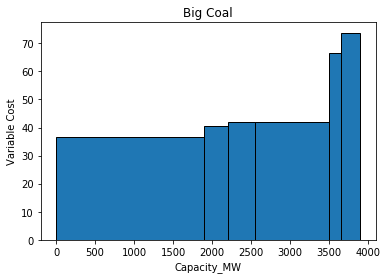

In [34]:
# Make the plot
plt.bar(new_x_coal, height_coal, width=width_coal)
# plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Big Coal')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')

plt.show()

Repeat the same process, this time for all the energy sources. Since we are not concerned with any one particular group here, we use the original **<font color = ##008700>ESG_sorted</font>** table.

In [31]:
width = ESG_sorted.column("Capacity_MW")
width
height = ESG_sorted.column("Total_Var_Cost_USDperMWH")
height

array([ 0.  ,  0.5 , 11.5 , 32.56, 32.56, 34.5 , 34.5 , 36.5 , 36.61,
       36.61, 38.06, 38.06, 38.78, 39.06, 39.5 , 40.5 , 40.94, 41.22,
       41.67, 41.94, 41.94, 42.39, 42.67, 43.83, 44.83, 47.44, 49.17,
       49.61, 52.06, 52.5 , 53.94, 58.28, 59.72, 61.17, 62.89, 65.5 ,
       66.5 , 69.83, 73.72, 75.61, 75.89, 90.06])

In [32]:
new_x = find_x_pos(width)
new_x

[500.0,
 1400.0,
 2300.0,
 3175.0,
 3925.0,
 4675.0,
 5425.0,
 6750.0,
 8032.5,
 8690.0,
 9365.0,
 10065.0,
 10582.5,
 10900.0,
 11400.0,
 11900.0,
 12375.0,
 13025.0,
 13825.0,
 14475.0,
 15125.0,
 15925.0,
 16675.0,
 17450.0,
 18000.0,
 18275.0,
 18425.0,
 18575.0,
 18725.0,
 19075.0,
 19400.0,
 19525.0,
 19950.0,
 20375.0,
 20525.0,
 20675.0,
 20825.0,
 20975.0,
 21175.0,
 21450.0,
 21725.0,
 21950.0]

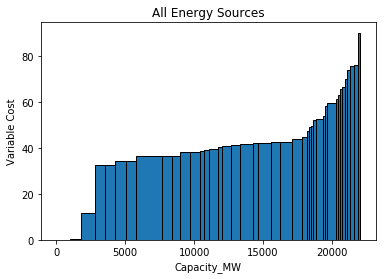

In [33]:
# Make the plot
plt.bar(new_x, height, width=width)
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')

plt.show()

Our aim now is to make a plot which shows all the different groups with unique colors. The first step in doing this is creating a dictionary called **<font color = ##008700>energy_colors_dict</font>** in which the groups and colors are a key-value pair. We use the following code to accomplish this:

In [35]:
energy_colors_dict = {}
count = 0
colors = ['#EC5F67', '#F29056', '#F9C863', '#99C794', '#5FB3B3', '#6699CC', '#C594C5']
for i in set(ESG_sorted['Group']):
    energy_colors_dict[i] = colors[count]
    count += 1

Now, we just map the colors from our dictionary to a series which contains all the groups. Our resultant list will have the same length as the **<font color = ##008700>ESG_sorted</font>** table.

In [37]:
colors_mapped = list(pd.Series(ESG_sorted['Group']).map(energy_colors_dict))

Finally, we add that array as a column to our original table.

In [38]:
ESG_sorted = ESG_sorted.with_column('Color', colors_mapped)

Our plot now shows the Variable Cost and Capacity for each group in a different color.

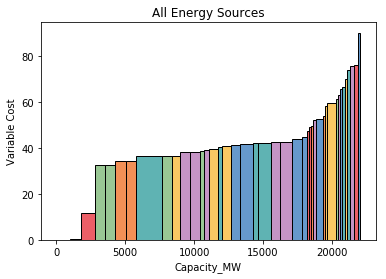

In [39]:
# Make the plot
plt.bar(new_x, height, width=width, color=ESG_sorted['Color'])
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')

plt.show()

To determine how many plants will produce, we will take into account the demand for energy production. We will set this variable below.

In [45]:
demand = 20000

The functions below will calculate the maximum variable cost companies can have in order to make profit based on the demand above. For this part we will make the assumption that plants are willing to sell at a price proportional to their variable cost.

In [46]:
def price_calc(demand, sorted_table):
    sum_cap = 0
    for i in range(0,len(sorted_table['Capacity_MW'])):
        if sum_cap + sorted_table['Capacity_MW'][i] > demand:
            global price
            price = sorted_table['Total_Var_Cost_USDperMWH'][i]
            break
        else:
            sum_cap += sorted_table['Capacity_MW'][i]

In [47]:
def price_line_plot():
    global price
    plt.axhline(y=price, color='r', linewidth = 2)
    print("Price: " + str(price))

In [48]:
def demand_plot():
    global demand
    plt.axvline(x=demand, color='r', linewidth = 2)
    print("Capacity: " + str(demand))

Next we will add the vertical line for demand and horizontal line for variable cost cap into the graph. Since we have our plants graphed in order of lowest variable cost to highest variable cost, we can see that the companies to the left of the vertical demand line will produce energy while the companies to the right of the vertical demand line will not. This is because the public will purchase from the plants that have the cheapest prices, and we have graphed the cumulative energy production of companies ordered by increasing variable cost of production.

Price: 59.72
Capacity: 20000


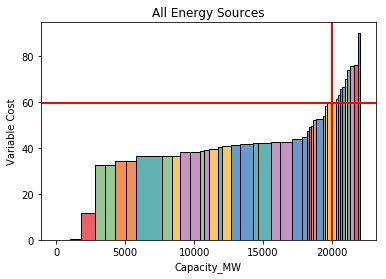

In [49]:
# Make the plot
plt.bar(new_x, height, width=width, color=ESG_sorted['Color'])
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')
price_calc(demand ,ESG_sorted)
price_line_plot()
demand_plot()

plt.show()

Now we will graph our variable cost cap with just the Big Coal plants.

Price: 59.72


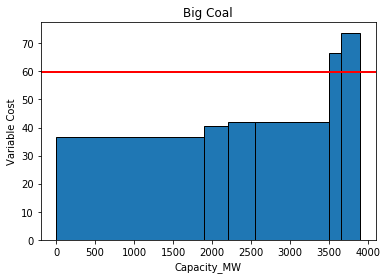

In [50]:
# Make the plot
plt.bar(new_x_coal, height_coal, width=width_coal)
plt.title('Big Coal')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')
price_line_plot()

plt.show()

Lastly, we calculate the profit that Big Coal plants can make.

In [51]:
sum(Big_Coal.where("Total_Var_Cost_USDperMWH", are.below(price))["Total_Var_Cost_USDperMWH"])

160.88

In [52]:
def profit(sorted_table):
    global price
    global capacity
    capacity_subset = sum(sorted_table.where("Total_Var_Cost_USDperMWH", are.below(price))["Capacity_MW"])
    revenue = capacity_subset * price
    cost = sum(sorted_table.where("Total_Var_Cost_USDperMWH", are.below(price))["Total_Var_Cost_USDperMWH"])
    return revenue - cost

In [53]:
profit(Big_Coal)

208859.12